Find velocity patterns during weekdays taken in from March to July, 2024.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, BSpline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import glob

In [ ]:
def draw_pattern(arr):
    row = int(np.ceil(len(arr)/5))
    col = 5
    fig, axs = plt.subplots(row,col,sharex=True, sharey=True)
    plt.tight_layout()
    for i in range(row):
        for j in range(col):
            if i*col + j < len(arr):
                axs[i][j].plot(range(len(arr[col*i+j])), arr[col*i+j])
                axs[i][j].set_title(col*i+j)

In [2]:
# read multiple csv files at once
path = r'data/weekday/'
file = glob.glob(path + "*.csv")

df = []
for f in file:
    df.append(pd.read_csv(f, encoding='cp949'))

# Concatenate all data into one DataFrame
vel = pd.concat(df, ignore_index=True)
vel.head()

,집계일자,집계시분,VDS_ID,지점이정,차로유형구분코드,평균속도,Unnamed: 6
0,2024-03-01,00:00,0010VDE00100,1.4,1,85.84,NaN
1,2024-03-01,00:00,0010VDE00200,2.4,1,92.69,NaN
2,2024-03-01,00:00,0010VDE00300,3.3,1,90.14,NaN
3,2024-03-01,00:00,0010VDE00400,4.5,1,-1.00,NaN
4,2024-03-01,00:00,0010VDE00500,5.1,1,-1.00,NaN


In [3]:
len(vel['집계일자'].unique())

25

In [4]:
vel['hour'] = vel['집계시분'].apply(lambda x: round(int(x.split(":")[0])+int(x.split(":")[1])/60,1))
vel.head()

,집계일자,집계시분,VDS_ID,지점이정,차로유형구분코드,평균속도,Unnamed: 6,hour
0,2024-03-01,00:00,0010VDE00100,1.4,1,85.84,NaN,0.0
1,2024-03-01,00:00,0010VDE00200,2.4,1,92.69,NaN,0.0
2,2024-03-01,00:00,0010VDE00300,3.3,1,90.14,NaN,0.0
3,2024-03-01,00:00,0010VDE00400,4.5,1,-1.00,NaN,0.0
4,2024-03-01,00:00,0010VDE00500,5.1,1,-1.00,NaN,0.0


In [5]:
vel = vel.iloc[:,[2,0,7,5]]
vel = vel.rename(columns={'집계일자':'date','평균속도':'avgVel'})
vel = vel.sort_values(by=['VDS_ID','date','hour'], ignore_index=True)
vel.head()

,VDS_ID,date,hour,avgVel
0,0010VDE00100,2024-03-01,0.0,85.84
1,0010VDE00100,2024-03-01,0.1,86.99
2,0010VDE00100,2024-03-01,0.2,81.66
3,0010VDE00100,2024-03-01,0.2,83.98
4,0010VDE00100,2024-03-01,0.3,94.33


In [107]:
# drop data whose velocity is equal to -1.0, 0.0 or larger than 110
# slice the data and make a boolean mask for data
data = []
vds = vel['VDS_ID'].unique()
for i in range(len(vds)*len(vel['date'].unique())):
    data.append(vel['avgVel'].values[288*i:288*(i+1)])
data = np.array(data)
bMask = [np.any((elem==-1.0)|(elem==-0.0)) for elem in data]
data = data[np.logical_not(np.array(bMask))]
data.shape

(103749, 288)

In [108]:
data[0]

array([85.84, 86.99, 81.66, 83.98, 94.33, 77.2 , 81.86, 88.17, 85.32,
       84.63, 89.37, 83.08, 89.49, 82.43, 85.99, 84.53, 82.65, 88.07,
       93.55, 94.3 , 83.75, 88.32, 72.73, 85.04, 86.16, 87.37, 82.42,
       95.19, 76.29, 87.57, 93.21, 82.14, 79.91, 83.46, 83.7 , 85.88,
       81.88, 87.52, 82.87, 87.62, 82.29, 86.76, 89.54, 86.2 , 78.37,
       80.28, 82.51, 82.3 , 81.87, 80.74, 84.  , 79.5 , 79.64, 79.66,
       80.31, 78.1 , 88.02, 81.63, 80.87, 82.34, 85.97, 87.36, 85.41,
       84.87, 86.33, 86.91, 82.9 , 81.86, 83.85, 82.42, 84.22, 81.08,
       83.64, 82.04, 83.76, 81.57, 79.17, 80.8 , 79.88, 83.03, 83.14,
       85.98, 84.14, 87.92, 86.3 , 81.51, 83.42, 83.68, 84.36, 83.65,
       86.6 , 85.66, 85.73, 85.42, 84.87, 86.86, 82.3 , 83.02, 83.01,
       81.36, 83.33, 81.59, 81.94, 79.99, 80.57, 84.5 , 80.53, 83.35,
       83.37, 79.81, 79.57, 79.06, 81.61, 77.63, 79.69, 79.16, 78.92,
       78.8 , 78.45, 75.1 , 76.42, 73.99, 74.29, 74.38, 75.76, 66.66,
       72.7 , 72.5 ,

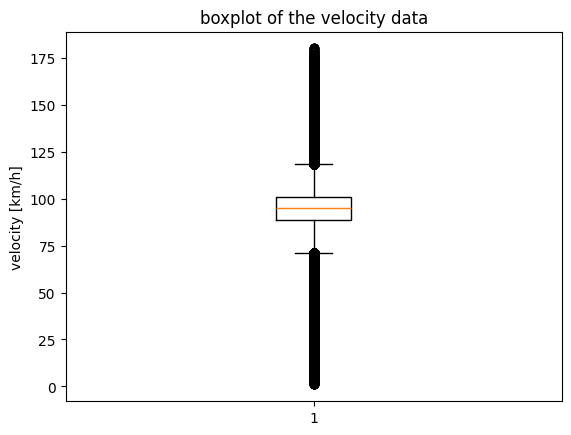

In [113]:
plt.boxplot(data.flatten())
plt.ylabel('velocity [km/h]')
plt.title('boxplot of the velocity data')
plt.show()

In [115]:
# turning back to our data, apply this method to each element of data
data_sp = []
h = np.linspace(0,24,288)
for i in range(len(data)):
    tck = splrep(h, data[i], s=1500)
    data_sp.append(BSpline(*tck)(h))

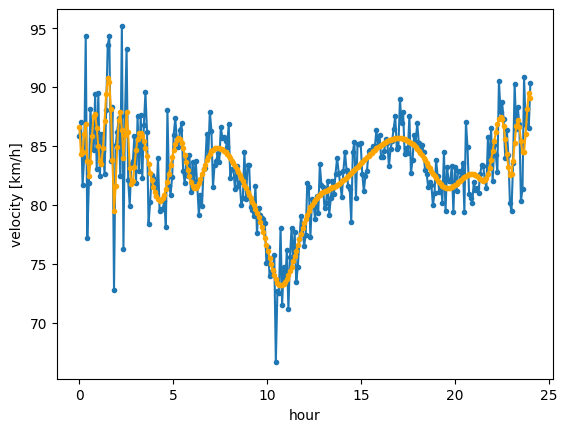

In [130]:
plt.plot(h,data[0],'.-')
plt.plot(h,data_sp[0],'.-',color='orange')
plt.xlabel('hour')
plt.ylabel('velocity [km/h]')
plt.show()

In [118]:
# scaler = MinMaxScaler()
# data_sp = np.array(data_sp)
# scaled_data = scaler.fit_transform(data_sp.reshape(-1,1))
# scaled_data = scaled_data.reshape(len(data),288)

# standardization
scaled_data = []
for i in range(np.shape(data_sp)[0]):
    scaler = MinMaxScaler()
    scaled_data.append(scaler.fit_transform(data_sp[i].reshape(-1,1)))
print(np.shape(scaled_data))
scaled_data = np.array(scaled_data)
scaled_data = scaled_data.reshape(len(data_sp),288)
print(np.shape(scaled_data))

(103749, 288, 1)
(103749, 288)


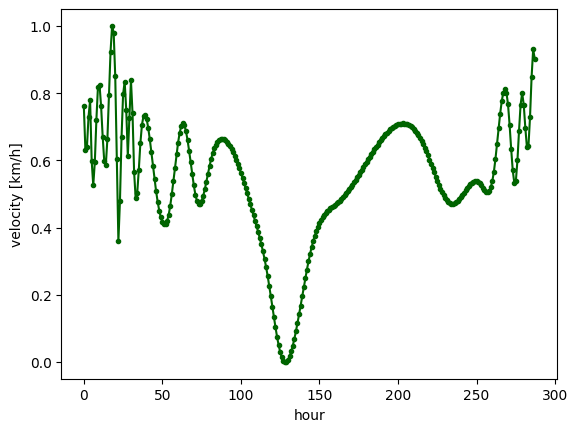

In [123]:
plt.plot(scaled_data[0],'.-',color='darkgreen')
plt.xlabel('hour')
plt.ylabel('velocity [km/h]')
plt.show()

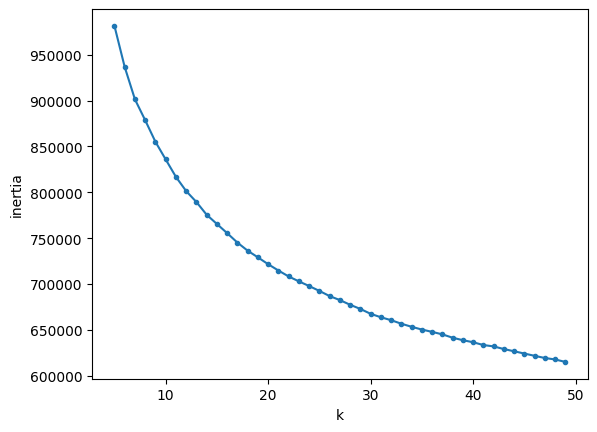

In [121]:
# find the best k for K-Means alg
inertia = []
for k in range(5,50):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(5,50),inertia,'.-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [ ]:
def control_k(scaled_data, k):
    # construct a kMeans model
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    cluster_num = list(len(scaled_data[km.labels_==i]) for i in range(k))
    
    # plot the distribution of cluster size
    plt.hist(cluster_num, edgecolor='k') #,bins=[100*i for i in range(8)]
    plt.xlabel('cluster size')
    plt.ylabel('frequency')
    plt.title('distribution of the cluster size')
    plt.show()

    # plot cluster centers
    # sort the plots in the descending order by using np.argsort
    cluster_num = list(len(scaled_data[km.labels_==i]) for i in range(k))
    cluster_num_sorted = sorted(cluster_num)
    sorted_index = np.argsort(cluster_num)
    sorted_arr = []
    for i in sorted_index:
        sorted_arr.append(km.cluster_centers_[i])
        
    row = int(np.ceil(len(sorted_arr)/5))
    col = 5
    fig, axs = plt.subplots(row,col,sharex=True, sharey=True, figsize=(7,k/5))
    plt.tight_layout()
    for i in range(row):
        for j in range(col):
            if i*col + j < len(sorted_arr):
                axs[i][j].plot(h, sorted_arr[col*i+j])
                axs[i][j].set_title(cluster_num_sorted[col*i+j])
    return km

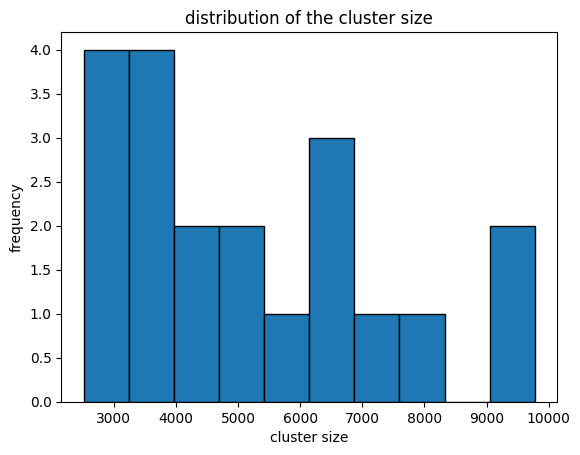

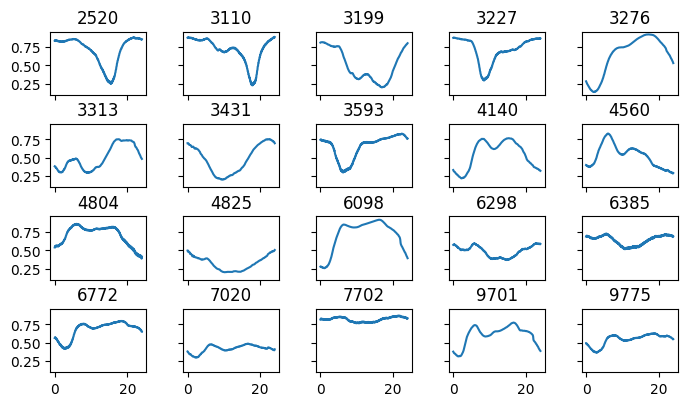

In [148]:
control_k(scaled_data,20)

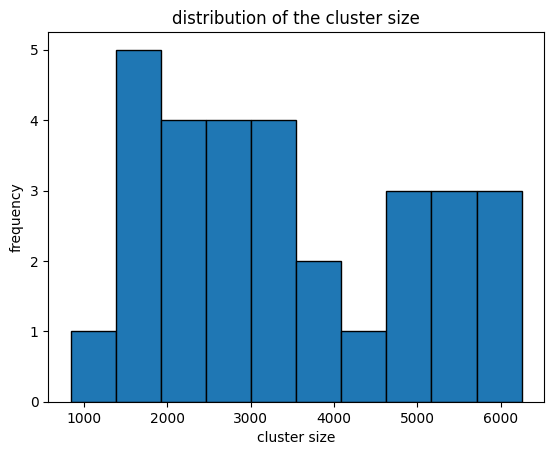

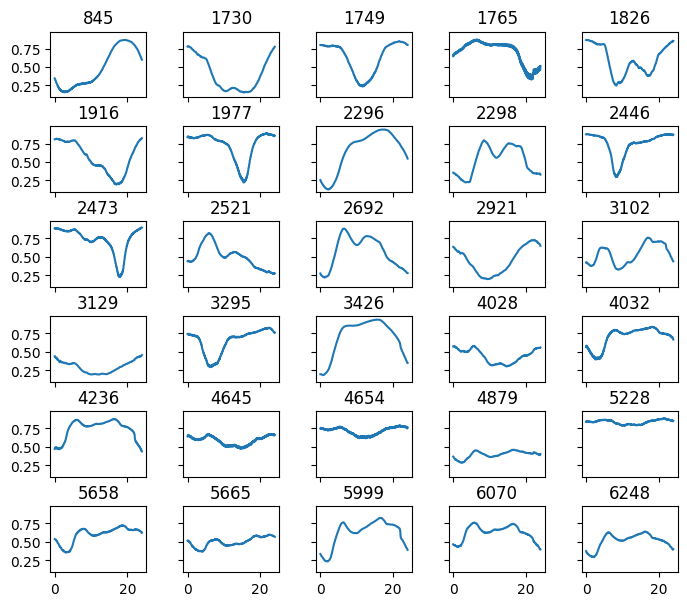

In [149]:
control_k(scaled_data,30)

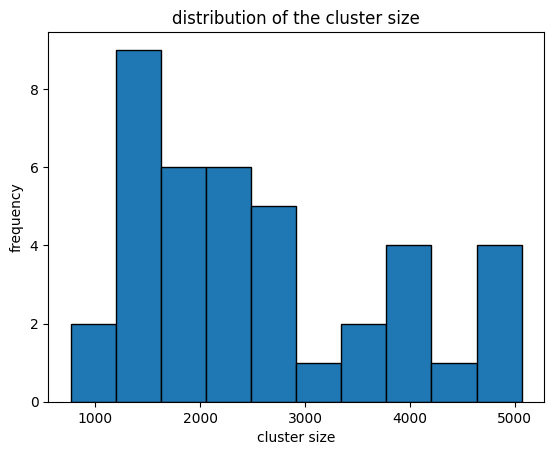

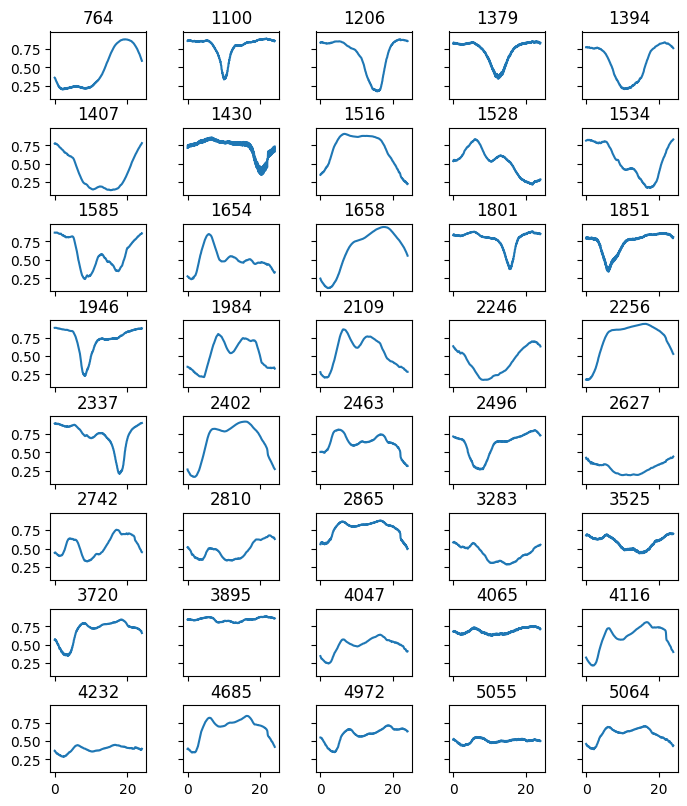

In [150]:
control_k(scaled_data,40)

In [ ]:
draw_pattern(control_k.labels_==39)